In [1]:
import nfl_data_py as nfl
import pandas as pd
import os
import urllib.request
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox
from matplotlib.offsetbox import OffsetImage

from PIL import Image
import numpy as np
from io import BytesIO
import requests
# ML Libraryies
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
#import hvplot.pandas
import plotly.express as px

# Graphing 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.pyplot import figure

In [2]:
#Import Stats from NFL library
qbr = nfl.import_qbr([2024])
weekly_nfl = nfl.import_weekly_data([2024])

Downcasting floats.


In [3]:
# Create DF to get epa rushing and receiving vs d
columns = ['opponent_team', 'receiving_epa', 'rushing_epa']
epa_df = weekly_nfl[columns]

epa_sum_df = epa_df.groupby('opponent_team').sum().reset_index()
epa_mean_df = epa_df.groupby('opponent_team').mean().reset_index()

epa_sum_df.head()

,opponent_team,receiving_epa,rushing_epa
0,ARI,134.554489,14.823619
1,ATL,126.028183,2.300089
2,BAL,129.986649,-51.328976
3,BUF,148.197906,-35.677841
4,CAR,157.129929,72.185783


In [4]:
# Add the 'receiving_epa' and 'rushing_epa' columns to create 'epa_total'
epa_sum_df['epa_total_d'] = epa_sum_df['receiving_epa'] + epa_sum_df['rushing_epa']
# mean stats
epa_mean_df['epa_total_d'] = epa_mean_df['receiving_epa'] + epa_mean_df['rushing_epa']


In [5]:
# Create DF to get epa rushing and receiving offense
columns_o = ['recent_team', 'receiving_epa', 'rushing_epa']
epa_df_o = weekly_nfl[columns_o]

epa_sum_df_o = epa_df_o.groupby('recent_team').sum().reset_index()
epa_mean_df_o = epa_df_o.groupby('recent_team').mean().reset_index()

# Add the 'receiving_epa' and 'rushing_epa' columns to create 'epa_total' offense
epa_sum_df_o['epa_total_offense'] = epa_sum_df_o['receiving_epa'] + epa_sum_df_o['rushing_epa']

# Add the 'receiving_epa' and 'rushing_epa' columns to create 'epa_total' offense mean
epa_mean_df_o['epa_total_offense'] = epa_mean_df_o['receiving_epa'] + epa_mean_df_o['rushing_epa']

In [6]:
# merge both df's together on team

total_epa_sum = epa_sum_df_o.merge(epa_sum_df, left_on='recent_team', right_on='opponent_team', how='inner')
total_epa_sum.head()

# merge for means
total_epa_mean = epa_mean_df_o.merge(epa_mean_df, left_on='recent_team', right_on='opponent_team', how='inner')



In [7]:
total_epa_mean.head()

,recent_team,receiving_epa_x,rushing_epa_x,epa_total_offense,opponent_team,receiving_epa_y,rushing_epa_y,epa_total_d
0,ARI,0.856219,0.276337,1.132556,ARI,0.982150,0.224600,1.206750
1,ATL,0.946773,-0.033518,0.913254,ATL,0.940509,0.029871,0.970380
2,BAL,1.624751,0.831351,2.456102,BAL,0.822700,-0.675381,0.147319
3,BUF,1.195714,0.640411,1.836124,BUF,0.956116,-0.488738,0.467378
4,CAR,0.228173,0.040159,0.268332,CAR,1.190378,1.002580,2.192958


In [8]:
total_epa_sum.head()

,recent_team,receiving_epa_x,rushing_epa_x,epa_total_offense,opponent_team,receiving_epa_y,rushing_epa_y,epa_total_d
0,ARI,109.596054,20.448927,130.044983,ARI,134.554489,14.823619,149.378113
1,ATL,105.091789,-1.977586,103.114204,ATL,126.028183,2.300089,128.328278
2,BAL,243.712723,64.845367,308.558105,BAL,129.986649,-51.328976,78.657669
3,BUF,190.118484,55.075317,245.193802,BUF,148.197906,-35.677841,112.520065
4,CAR,29.434254,2.690683,32.124935,CAR,157.129929,72.185783,229.315704


In [9]:
# Get NFL Logos for DF
logos = nfl.import_team_desc()[['team_abbr', 'team_logo_espn']]
logo_paths = []
team_abbr = []
if not os.path.exists("logos"):
    os.makedirs("logos")

for team in range(len(logos)):
    urllib.request.urlretrieve(logos['team_logo_espn'][team], f"logos/{logos['team_abbr'][team]}.tif")
    logo_paths.append(f"logos/{logos['team_abbr'][team]}.tif")
    team_abbr.append(logos['team_abbr'][team])

data = {'team_abbr' : team_abbr, 'logo_path' : logo_paths}
logo_data = pd.DataFrame(data)

complete_epa_df = pd.merge(total_epa_sum, logo_data, left_on = 'recent_team', right_on = 'team_abbr')
complete_epa_df.head()

,recent_team,receiving_epa_x,rushing_epa_x,epa_total_offense,opponent_team,receiving_epa_y,rushing_epa_y,epa_total_d,team_abbr,logo_path
0,ARI,109.596054,20.448927,130.044983,ARI,134.554489,14.823619,149.378113,ARI,logos/ARI.tif
1,ATL,105.091789,-1.977586,103.114204,ATL,126.028183,2.300089,128.328278,ATL,logos/ATL.tif
2,BAL,243.712723,64.845367,308.558105,BAL,129.986649,-51.328976,78.657669,BAL,logos/BAL.tif
3,BUF,190.118484,55.075317,245.193802,BUF,148.197906,-35.677841,112.520065,BUF,logos/BUF.tif
4,CAR,29.434254,2.690683,32.124935,CAR,157.129929,72.185783,229.315704,CAR,logos/CAR.tif


In [10]:
# Get NFL Logos for DF for Mean
logos = nfl.import_team_desc()[['team_abbr', 'team_logo_espn']]
logo_paths = []
team_abbr = []
if not os.path.exists("logos"):
    os.makedirs("logos")

for team in range(len(logos)):
    urllib.request.urlretrieve(logos['team_logo_espn'][team], f"logos/{logos['team_abbr'][team]}.tif")
    logo_paths.append(f"logos/{logos['team_abbr'][team]}.tif")
    team_abbr.append(logos['team_abbr'][team])

data = {'team_abbr' : team_abbr, 'logo_path' : logo_paths}
logo_data = pd.DataFrame(data)

complete_epa_df_mean = pd.merge(total_epa_mean, logo_data, left_on = 'recent_team', right_on = 'team_abbr')
complete_epa_df_mean.head()

,recent_team,receiving_epa_x,rushing_epa_x,epa_total_offense,opponent_team,receiving_epa_y,rushing_epa_y,epa_total_d,team_abbr,logo_path
0,ARI,0.856219,0.276337,1.132556,ARI,0.982150,0.224600,1.206750,ARI,logos/ARI.tif
1,ATL,0.946773,-0.033518,0.913254,ATL,0.940509,0.029871,0.970380,ATL,logos/ATL.tif
2,BAL,1.624751,0.831351,2.456102,BAL,0.822700,-0.675381,0.147319,BAL,logos/BAL.tif
3,BUF,1.195714,0.640411,1.836124,BUF,0.956116,-0.488738,0.467378,BUF,logos/BUF.tif
4,CAR,0.228173,0.040159,0.268332,CAR,1.190378,1.002580,2.192958,CAR,logos/CAR.tif


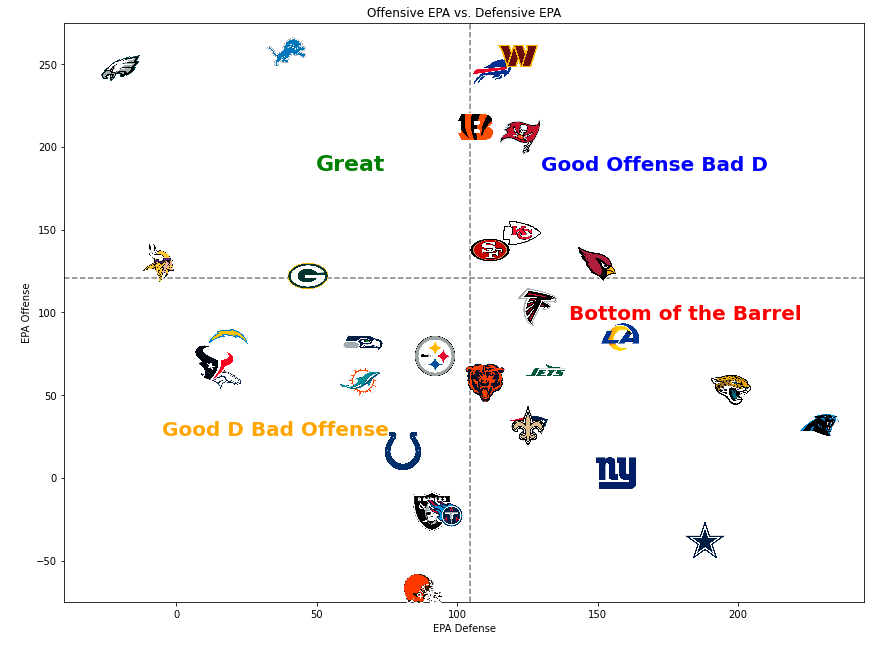

In [11]:
#Create Graph For EPA

import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np
from PIL import Image, ImageOps  # Make sure to import ImageOps here


plt.rcParams["figure.figsize"] = [12, 9]
plt.rcParams["figure.autolayout"] = True

# Function to load, resize, and pad images to a consistent size
def getImage(path):
    img = Image.open(path)
    
    # Resize image while maintaining aspect ratio
    img = ImageOps.fit(img, (550, 550), method=0, bleed=0.0, centering=(0.5, 0.5))
    
    return OffsetImage(np.array(img), zoom=0.08)

y = complete_epa_df['epa_total_offense']
x = complete_epa_df['epa_total_d']
paths = complete_epa_df_mean['logo_path']

fig, ax = plt.subplots()

# Define quadrant boundaries
x_mid = (x.max() + x.min()) / 2
y_mid = (y.max() + y.min()) / 2



# Quadrant 1 (Top-Right)
for x0, y0, path in zip(x, y, paths):
    if x0 >= x_mid and y0 >= y_mid:
        ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
        ax.add_artist(ab)

# Quadrant 2 (Top-Left)
for x0, y0, path in zip(x, y, paths):
    if x0 < x_mid and y0 >= y_mid:
        ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
        ax.add_artist(ab)

# Quadrant 3 (Bottom-Left)
for x0, y0, path in zip(x, y, paths):
    if x0 < x_mid and y0 < y_mid:
        ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
        ax.add_artist(ab)

# Quadrant 4 (Bottom-Right)
for x0, y0, path in zip(x, y, paths):
    if x0 >= x_mid and y0 < y_mid:
        ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
        ax.add_artist(ab)

plt.axvline(x_mid, color='black', linestyle='--', alpha=0.5)
plt.axhline(y_mid, color='black', linestyle='--', alpha=0.5)

plt.title("Offensive EPA vs. Defensive EPA")
plt.ylabel("EPA Offense")
plt.xlabel("EPA Defense")
plt.grid(False)
plt.xlim(-40, 245)
plt.ylim(-75, 275)
# Quadrant 1 
plt.text(x_mid + 25, y_mid + 65, 'Good Offense Bad D', fontsize=20, color='blue', fontweight='bold')

# Quadrant 2 
plt.text(x_mid - 55, y_mid + 65, 'Great', fontsize=22, color='green',fontweight='bold')

# Quadrant 3 
plt.text(x_mid - 110, y_mid - 95, 'Good D Bad Offense', fontsize=20, color='orange', fontweight='bold')

# Quadrant 4 
plt.text(x_mid + 35, y_mid - 25, 'Bottom of the Barrel', fontsize=20, color='red', fontweight='bold')

# Worst O
#plt.text(x_mid - 96, y_mid - 160, 'Worst Offense', fontsize=10, color='red', fontweight='bold')

# Best O
#plt.text(x_mid - 30, y_mid + 30, 'Best Offense', fontsize=10, color='green', fontweight='bold')

# Best D
#plt.text(x_mid - 138, y_mid - 120, 'Best Defense', fontsize=10, color='green', fontweight='bold')

# worst D
#plt.text(x_mid + 101, y_mid - 28, 'Worst Defense', fontsize=10, color='red', fontweight='bold')

#plt.savefig('total_epa.png')
plt.show()


Text(1.8224221467971802, -1.1591191291809082, 'Bottom of the Barrel')

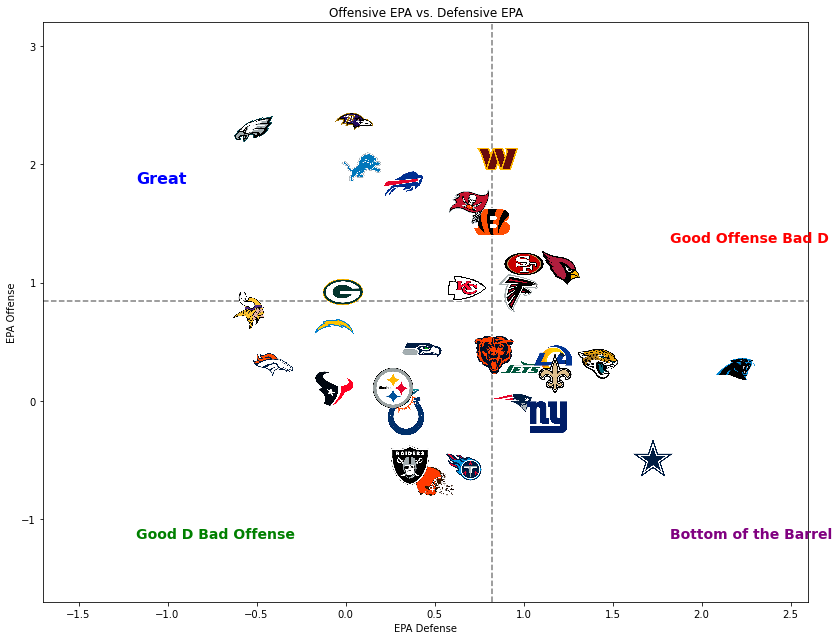

In [73]:
#Create Graph For EPA Average

import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np
from PIL import Image, ImageOps  # Make sure to import ImageOps here


plt.rcParams["figure.figsize"] = [12, 9]
plt.rcParams["figure.autolayout"] = True

# Function to load, resize, and pad images to a consistent size
def getImage(path):
    img = Image.open(path)
    
    # Resize image while maintaining aspect ratio
    img = ImageOps.fit(img, (550, 550), method=0, bleed=0.0, centering=(0.5, 0.5))
    
    return OffsetImage(np.array(img), zoom=0.08)

y = complete_epa_df_mean['epa_total_offense']
x = complete_epa_df_mean['epa_total_d']
paths = complete_epa_df_mean['logo_path']

fig, ax = plt.subplots()

# Define quadrant boundaries
x_mid = (x.max() + x.min()) / 2
y_mid = (y.max() + y.min()) / 2



# Quadrant 1 (Top-Right)
for x0, y0, path in zip(x, y, paths):
    if x0 >= x_mid and y0 >= y_mid:
        ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
        ax.add_artist(ab)

# Quadrant 2 (Top-Left)
for x0, y0, path in zip(x, y, paths):
    if x0 < x_mid and y0 >= y_mid:
        ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
        ax.add_artist(ab)

# Quadrant 3 (Bottom-Left)
for x0, y0, path in zip(x, y, paths):
    if x0 < x_mid and y0 < y_mid:
        ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
        ax.add_artist(ab)

# Quadrant 4 (Bottom-Right)
for x0, y0, path in zip(x, y, paths):
    if x0 >= x_mid and y0 < y_mid:
        ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
        ax.add_artist(ab)

plt.axvline(x_mid, color='black', linestyle='--', alpha=0.5)
plt.axhline(y_mid, color='black', linestyle='--', alpha=0.5)

plt.title("Offensive EPA vs. Defensive EPA")
plt.ylabel("EPA Offense")
plt.xlabel("EPA Defense")
plt.grid(False)
plt.xlim(-1.7, 2.6)
plt.ylim(-1.7, 3.2)
# Quadrant 1 
plt.text(x_mid + 1 , y_mid + .5, 'Good Offense Bad D', fontsize=14, color='red', fontweight='bold')

# Quadrant 2 
plt.text(x_mid - 2, y_mid + 1, 'Great', fontsize=16, color='blue',fontweight='bold')

# Quadrant 3 
plt.text(x_mid - 2, y_mid - 2, 'Good D Bad Offense', fontsize=14, color='green', fontweight='bold')

# Quadrant 4 
plt.text(x_mid + 1, y_mid - 2, 'Bottom of the Barrel', fontsize=14, color='purple', fontweight='bold')

In [ ]:
# create power rankings:
power_rankings = complete_epa_df.drop(['opponent_team', 'recent_team', 'team_abbr', 'logo_path'], axis=1)
#power_rankings_class = power_rankings.set_index('recent_team')
power_rankings.head()

#mean 
power_rankings_mean = complete_epa_df_mean.drop(['opponent_team', 'recent_team', 'team_abbr', 'logo_path'], axis=1)

In [ ]:
# create classes 
# create df model
def get_clusters(k, data):
    # Create a copy of the DataFrame
    data = data.copy()

    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Fit the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [ ]:
#get classes for team
team_ranks = get_clusters(5, power_rankings)

# mean
team_ranks_mean = get_clusters(5, power_rankings_mean)


In [ ]:
#add back team
#team_power = pd.merge(team_ranks, complete_epa_df, left_index=True, right_index=True)
team_power = team_ranks.merge(complete_epa_df, left_index=True, right_index=True)

#mean
team_power_mean = team_ranks_mean.merge(complete_epa_df_mean, left_index=True, right_index=True)


In [ ]:
# List of columns to remove
columns_to_remove = ['receiving_epa_x_y', 'rushing_epa_x_y', 'epa_total_offense_y', 'opponent_team',
                     'receiving_epa_y_y', 'rushing_epa_y_y', 'epa_total_d_y', 'team_abbr']

# Remove specified columns and store them in the list
#team_power = team_power.drop(columns=columns_to_remove)
team_power.to_excel('team_rankings_7.xlsx', index=False)
#mean
team_power_mean.to_excel('team_rankings_8.xlsx', index=False)


In [77]:
# classes 
class_zero = team_power[team_power['class'] == 0]
class_one = team_power[team_power['class'] == 1]
class_two = team_power[team_power['class'] == 2]
class_three = team_power[team_power['class'] == 3]
class_four = team_power[team_power['class'] == 4]
#class_five = team_power[team_power['class'] == 5]
#class_six = team_power[team_power['class'] == 6]
#class_seven = team_power[team_power['class'] == 7]


,receiving_epa_x_x,rushing_epa_x_x,epa_total_offense_x,receiving_epa_y_x,rushing_epa_y_x,epa_total_d_x,class,recent_team,receiving_epa_x_y,rushing_epa_x_y,epa_total_offense_y,opponent_team,receiving_epa_y_y,rushing_epa_y_y,epa_total_d_y,team_abbr,logo_path
0,8.129718,3.931950,12.061667,15.683219,3.497710,19.180929,4,ARI,8.129718,3.931950,12.061667,ARI,15.683219,3.497710,19.180929,ARI,logos/ARI.tif
1,-7.576805,-6.224773,-13.801578,3.547840,-5.234161,-1.686321,6,ATL,-7.576805,-6.224773,-13.801578,ATL,3.547840,-5.234161,-1.686321,ATL,logos/ATL.tif
2,7.461783,6.823554,14.285337,23.773897,-8.205110,15.568788,4,BAL,7.461783,6.823554,14.285337,BAL,23.773897,-8.205110,15.568788,BAL,logos/BAL.tif
3,27.438770,2.036378,29.475147,5.123976,0.331071,5.455047,1,BUF,27.438770,2.036378,29.475147,BUF,5.123976,0.331071,5.455047,BUF,logos/BUF.tif
4,-28.043562,-8.745651,-36.789215,15.885196,7.806555,23.691751,7,CAR,-28.043562,-8.745651,-36.789215,CAR,15.885196,7.806555,23.691751,CAR,logos/CAR.tif
